In [52]:
import pandas as pd
import numpy as np

from scib_metrics.benchmark import Benchmarker
import scanpy as sc
#adata = sc.read_h5ad('../H19.30.001.STG.4000.expand.rep1.h5ad')
bm = Benchmarker(
    adata,
    batch_key="perturbation",
    label_key="cell_type0528",
    embedding_obsm_keys=["harmony", "contrastivevi_bg", "no_pretraining", "base_ct"],
    pre_integrated_embedding_obsm_key='X_pca',
    n_jobs=6,
)


/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_77373/4202289717.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Total_rescaled'][:-1] = (df_['Total'][:-1] - df_['Total'][:-1].min()) / (df_['Total'][:-1].max() - df_['Total'][:-1].min())


In [53]:
df = pd.read_csv('merfish/stg_benchmark_niche.csv',index_col=0)
df = pd.merge(df.iloc[:,:-1],pd.read_csv('merfish/stg_niche_add.csv',index_col=0),left_index=True,right_index=True)
df[['spicemix'+str(i) for i in range(10)]] = pd.read_csv('merfish/stg_niche_spicemix.csv',index_col=0).iloc[:,0:10]
df[['spicemix_harmony'+str(i) for i in range(10)]] = pd.read_csv('merfish/stg_niche_spicemix.csv',index_col=0).iloc[:,10:20]
df = df.drop(index='pcr_comparison')
#df = df.drop(columns='X_pca')

bm._results = df
df_2 = bm.get_results(min_max_scale=False).T
df_2 = df_2.T

df = pd.read_csv('merfish/stg_benchmark_myh11.csv',index_col=0)
df = pd.merge(df.iloc[:,:-1],pd.read_csv('merfish/stg_myh11_add.csv',index_col=0),left_index=True,right_index=True)
df[['spicemix'+str(i) for i in range(10)]] = pd.read_csv('merfish/stg_myh11_spicemix.csv',index_col=0).iloc[:,0:10]
df[['spicemix_harmony'+str(i) for i in range(10)]] = pd.read_csv('merfish/stg_myh11_spicemix.csv',index_col=0).iloc[:,10:20]
df = df.drop(index='pcr_comparison')
#df = df.drop(columns='X_pca')

bm._results = df
df_3 = bm.get_results(min_max_scale=True).T
df_3 = df_3.T

## this treatment merges intrinsic / spatial rows when plotting the summary

df_2.index = [col.replace('simvikl2_s', 'simvikl2_z') if 'simvikl2_s' in col else col for col in df_2.index]
df_3.index = [col.replace('simvikl2_s', 'simvikl2_z') if 'simvikl2_s' in col else col for col in df_3.index]

df_f = pd.merge(df_,df_2,left_index=True,right_index=True)

df_f = pd.merge(df_f,df_3,left_index=True,right_index=True)



df_f['Total'] = 0
df_f['Total'][:-1] = (1/4) * (df_f['Batch correction_x'].values[:-1] + df_f['Bio conservation_x'].values[:-1] +  df_f['Bio conservation_y'].values[:-1]+  df_f['Bio conservation'].values[:-1])

def nmlz(x):
    return (x - x.min())/(x.max() - x.min())

normalize = False

if normalize:
    df_f['Total_rescaled'] = 0
    df_f['Total_rescaled'][:-1] = (1/4) * (nmlz(df_f['Batch correction_x'].values[:-1]) + nmlz(df_f['Bio conservation_x'].values[:-1]) +  nmlz(df_f['Bio conservation_y'].values[:-1]) +  nmlz(df_f['Bio conservation'].values[:-1]))
else:
    df_f['Total_rescaled'] = 0
    df_f['Total_rescaled'][:-1] = (df_f['Total'][:-1] - df_f['Total'][:-1].min()) / (df_f['Total'][:-1].max() - df_f['Total'][:-1].min())

df_f['name'] = df_f.index.str[:-1]
df_summary_mean = df_f.iloc[:-1].groupby('name').mean()
df_summary_std = df_f.iloc[:-1].groupby('name').std()
df_summary_mean


df_summary_mean = df_summary_mean.iloc[[5,8,6,7,0,1,2,3,4,14,15,10,12,11,13]]
df_summary_std = df_summary_std.iloc[[5,8,6,7,0,1,2,3,4,14,15,10,12,11,13]]

df_summary_mean.index=['Harmony','scVI','MEFISTO','NSF','GraphST','GraphST + Harmony','STAGATE','STAGATE + Harmony','CellCharter','SpiceMix','SpiceMix + Harmony','Graph Only','Graph Only + cell type 1 (NCEM)', r'Graph Only + cell type 2 (NCEM)','SIMVI (intrinsic / spatial)']
df_summary_std.index = df_summary_mean.index

df_summary_mean = df_summary_mean[['Batch correction_x','Bio conservation_x','Bio conservation_y','Bio conservation','Total_rescaled']]
df_summary_std = df_summary_std[['Batch correction_x','Bio conservation_x','Bio conservation_y','Bio conservation','Total_rescaled']]
if normalize:
    df_summary_mean.columns = ['Batch correction\nscore','Cell type\npreservation score','Layer\npreservation score','Local niche\npreservation score'+r'$^\dagger$',r'Total score$^\dagger$']
    df_summary_std.columns = ['Batch correction\nscore','Cell type\npreservation score','Layer\npreservation score','Local niche\npreservation score'+r'$^\dagger$',r'Total score$^\dagger$']
else:
    df_summary_mean.columns = ['Batch correction\nscore','Cell type\npreservation score','Layer\npreservation score','Local niche\npreservation score'+r'$^\dagger$','Total score*']
    df_summary_std.columns = ['Batch correction\nscore','Cell type\npreservation score','Layer\npreservation score','Local niche\npreservation score'+r'$^\dagger$','Total score*']
df_summary_ste = df_summary_std / np.sqrt(10)

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_77373/2822912928.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total'][:-1] = (1/4) * (df_f['Batch correction_x'].values[:-1] + df_f['Bio conservation_x'].values[:-1] +  df_f['Bio conservation_y'].values[:-1]+  df_f['Bio conservation'].values[:-1])
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_77373/2822912928.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Total_rescaled'][:-1] = (df_f['Total'][:-1] - df_f['Total'][:-1].min()) / (df_f['Total'][:-1].max() - df_f['Total'][:-1].min())


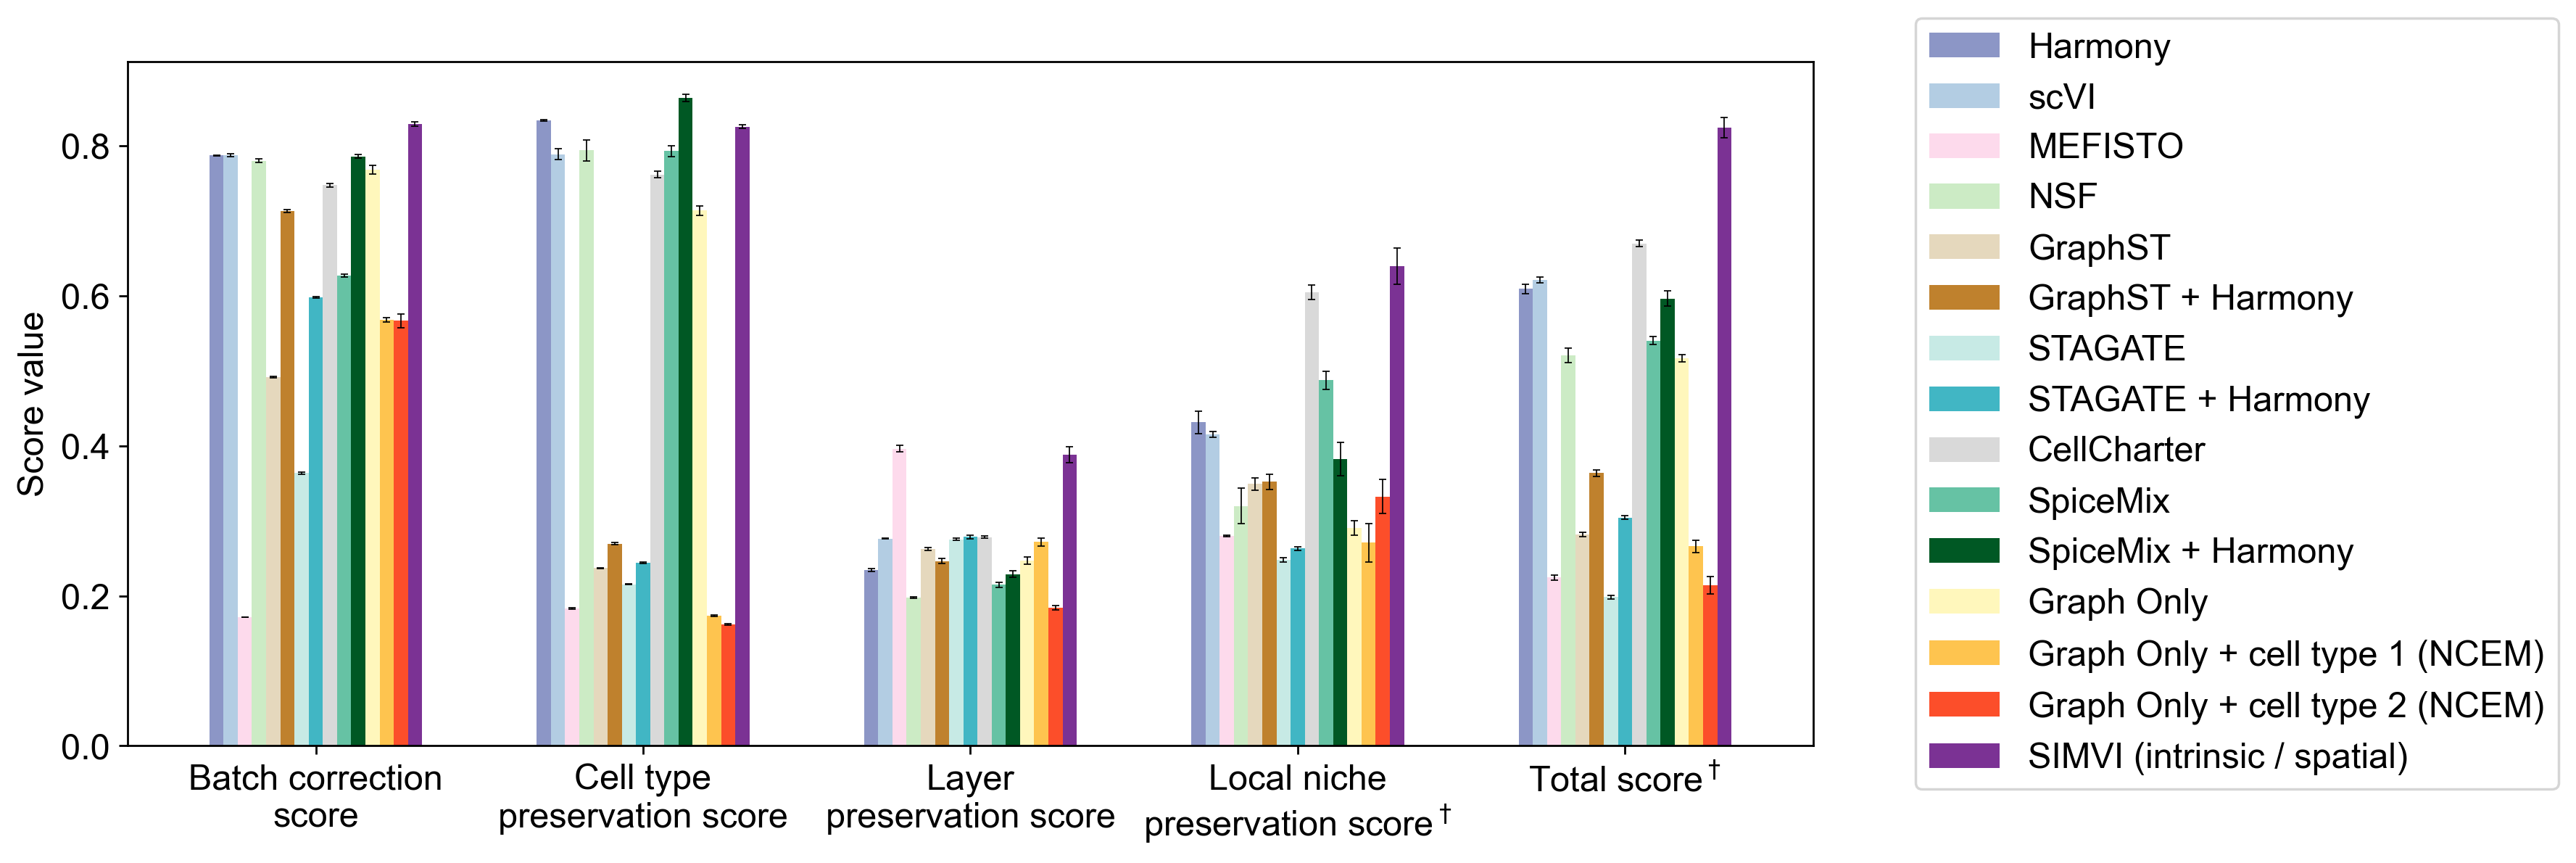

In [51]:
# running above cell with normalize = True / False respectively

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 14
fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5,  
                   'ecolor': 'black', 
                   'capsize': 1.5,     
                   'capthick': 0.5}     

color_list = ['#8c96c6','#b3cde3','#fddaec','#ccebc5','#e5d8bd','#bf812d','#c7eae5','#41b6c4','#d9d9d9','#66c2a4','#005824','#fff7bc','#fec44f','#fc4e2a','#7b3294']
df_summary_mean.T.plot(kind="bar",rot=0,edgecolor='none',color=color_list,figsize=(12,5),ax=axs,yerr=df_summary_ste.T, error_kw=error_bar_style,width=0.65)

axs.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
axs.set_ylabel('Score value')
#plt.axvline(x=2.5, color='gray', linestyle='--', linewidth=1)
plt.savefig('stg_benchmarking_main_normalized.pdf',bbox_inches='tight')

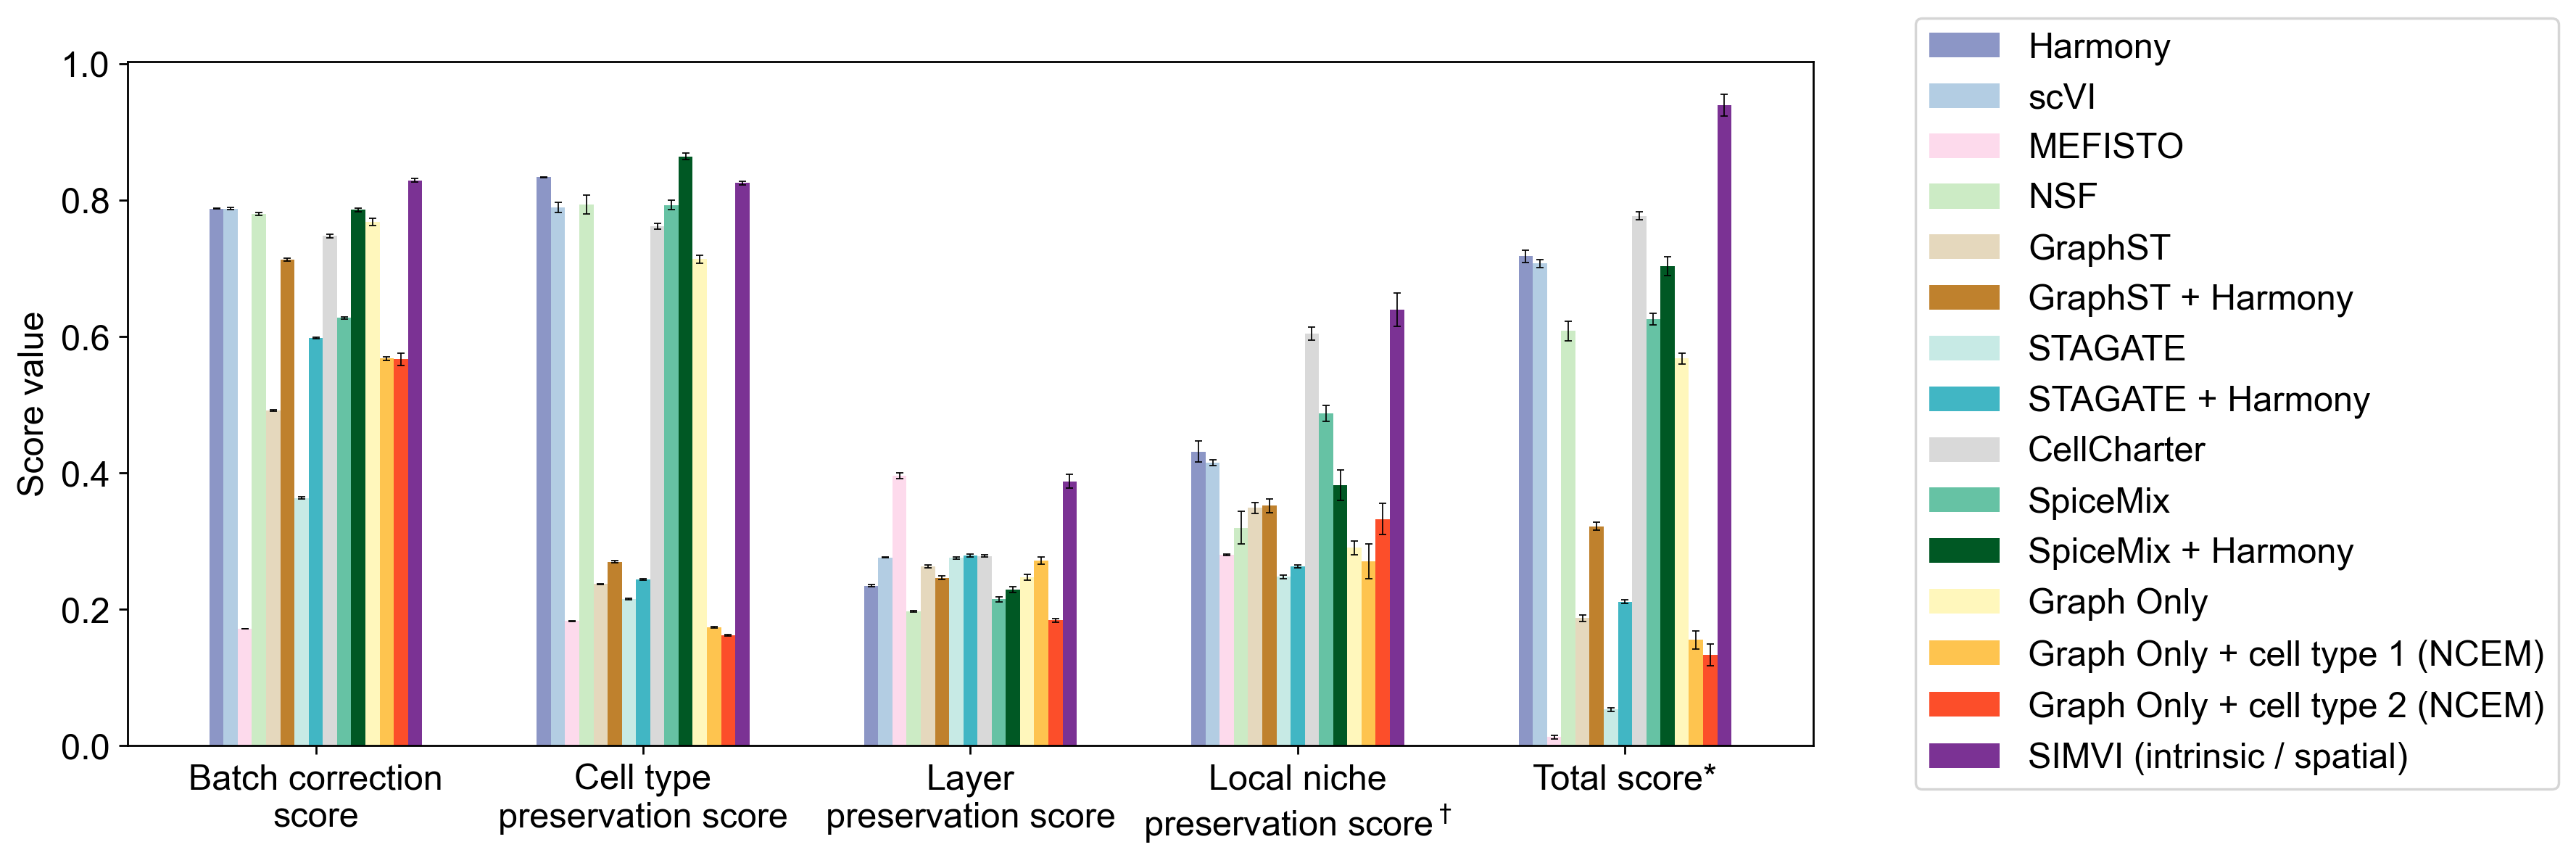

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Arial'
plt.rcParams['figure.dpi'] = 250
plt.rcParams["font.size"] = 14
fig, axs = plt.subplots(figsize=(4,2))
error_bar_style = {'elinewidth': 0.5,
                   'ecolor': 'black', 
                   'capsize': 1.5,     
                   'capthick': 0.5}    

color_list = ['#8c96c6','#b3cde3','#fddaec','#ccebc5','#e5d8bd','#bf812d','#c7eae5','#41b6c4','#d9d9d9','#66c2a4','#005824','#fff7bc','#fec44f','#fc4e2a','#7b3294']
df_summary_mean.T.plot(kind="bar",rot=0,edgecolor='none',color=color_list,figsize=(12,5),ax=axs,yerr=df_summary_ste.T, error_kw=error_bar_style,width=0.65)

axs.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))
axs.set_ylabel('Score value')
#plt.axvline(x=2.5, color='gray', linestyle='--', linewidth=1)
plt.savefig('stg_benchmarking_main.pdf',bbox_inches='tight')